# Wrangling + Tf-Idf model

In [63]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [64]:
data = pd.read_csv("clean_data.csv") # json new way

Look at the data:

In [65]:
print(data.describe(include="object"))

        title   identifier                                        description  \
count    3924         3924                                               3924   
unique   3505         3924                                               3642   
top     Dance  AMST-103-HM  Individual Instruction, Level II. Initial enro...   
freq        8            1                                                 37   

        source instructors         offered prerequisites corequisites  \
count     3924        3924            2616           954           32   
unique       5        1190             133           621           27   
top     Pomona          []  Each semester.   PSYC 051 PO  BIOL052 HM    
freq      1299        1683             383            16            2   

       department  
count        3924  
unique        100  
top          HIST  
freq          274  


### Tf-Idf with scikit-learn
[Description](https://monkeylearn.com/blog/what-is-tf-idf/)

[Usage](https://kavita-ganesan.com/tfidftransformer-tfidfvectorizer-usage-differences/#.Y1M42ezMJhF)

Here is an example of how Tf-Idf would work if our documents were the following 4 sentences:

In [6]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

corpus = [
     'this is the first document',
     'this document is the second document',
     'and this is the third one',
     'is this the first document',
]
vectorizer = TfidfVectorizer(use_idf=True)
vectors = vectorizer.fit_transform(corpus)
firstv = vectors[0]
df = pd.DataFrame(firstv.T.todense(), index=vectorizer.get_feature_names(), columns=["tfidf"])
df = df.sort_values(by=["tfidf"], ascending = False)
print("TfIdf values for the first sentence")
print(df)


TfIdf values for the first sentence
             tfidf
first     0.580286
document  0.469791
is        0.384085
the       0.384085
this      0.384085
and       0.000000
one       0.000000
second    0.000000
third     0.000000


In the example above we can see the importance of each word ranked for the first sentence `'this is the first document'`. So, for example the word `first` is important since it doesn't appear in any other document. The word `the` is not as important since it appears in all other documents. And the word `third` is not important at all since it doesn't even appear in the first document.

### Rank classes based on a given word
Function `tfidf_word(word, data)` takes in the word we are interested in and the data we are looking at. The function returns an updated dataframe with a new column `"score"` that gives each class a score of importance based on the input word. 

In [66]:
def tfidf_word(word, data_1):
    data_2 = data_1.copy() # since we don't want to be making changes to our original dataframe
    corpus = list(data_2.description)
    vectorizer = TfidfVectorizer(use_idf=True, stop_words='english')
    vectors = vectorizer.fit_transform(corpus)

    score_for_word = []
    words = vectorizer.get_feature_names()
    try:
        index = words.index(word)
    except:
        print("'" + word + "'" + " is not mentioned in any course descriptions")
        return

    for i in range(0, len(corpus)):
        value = vectors[i].T.todense()[index]
        score_for_word.append(value)

    score_for_word = [float(i) for i in score_for_word] # type cast each score to a float

    data_2["score"] = score_for_word
    return data_2

For example, let's say we are interested in ranking all of the classes based on the word `computer`:

In [67]:
tfidf_word('computer', data).sort_values(by=["score"], ascending = False).head(5)

Unnamed: 0                                       title    identifier  \
127          132                    Computer Science Seminar   CSCI-181-HM   
506          525          Special Topics in Computer Science   CSCI-181-CM   
1420        1485                 Computer Science Colloquium   CSCI-188-PO   
417          426  Introduction to Computational Neuroscience  BIOL-133L-KS   
1030        1059       Computational Physics and Engineering   PHYS-100-KS   

                                            description            source  \
127   Advanced topics of current interest in compute...        HarveyMudd   
506   Selected topics in computer science. May be re...  ClaremontMckenna   
1420  Colloquium presentations and discussions of to...            Pomona   
417   This course provides computational skills for ...  ClaremontMckenna   
1030  This course is a comprehensive introduction to...  ClaremontMckenna   

      credits          instructors          offered  \
127         0            ['Staff']  Fall and Spring   
506       100                   []     Occasionally   
1420        0  ['Joseph C Osborn']   Each semester.   
417       100                   []       Every fall   
1030      100       ['Scot Gould']     Every spring   

                                          prerequisites corequisites  \
127                            Permission of instructor          NaN   
506                                                 NaN          NaN   
1420  CSCI 051A PO , or CSCI 051G PO , or CSCI 051J ...          NaN   
417                                                 NaN          NaN   
1030                                                NaN          NaN   

      currently_offered  fee department     score  
127               False    0       CSCI  0.517196  
506               False    0       CSCI  0.481765  
1420               True    0       CSCI  0.429991  
417               False    0       BIOL  0.365221  
1030               True    0       PHYS  0.343432

These are the first 10 instances of the classes that are most related to the word `computer` ranked in descending order (more related classes are on top). So, we could recomend a student who is interested in `computer`
 to take these classes.

Bellow are the outputs for fords `data, culture, activism, fiction, environment`

In [9]:
tfidf_word('environment', data).sort_values(by=["score"], ascending = False).head(5)

Unnamed: 0                                             title  \
1707        1790  Food and the Environment in Asia and the Pacific   
1017        1046                              Environmental Ethics   
447          456                                      Microbiology   
3456        3665                   Critical Environmental Analysis   
2384        2530   Africa, the Environment, and the Global Economy   

        identifier                                        description  \
1707  HIST-101F-PO  A single question inspired this seminar: what ...   
1017   PHIL-187-CM  An exploration of human beings’ ethical relati...   
447   BIOL-168L-KS  In this fundamental microbiology course we wil...   
3456     EA-150-PZ  A seminar examination of how environmental iss...   
2384   SOC-189H-PO  Drawing on sociology and related disciplines, ...   

                source  credits           instructors  \
1707            Pomona      100      ['S. Yamashita']   
1017  ClaremontMckenna      100                    []   
447   ClaremontMckenna      100  ['Pete Chandrangsu']   
3456            Pitzer        0                    []   
2384            Pomona      100       ['S. Stefanos']   

                        offered prerequisites corequisites  currently_offered  \
1707  Last offered spring 2018.           NaN          NaN              False   
1017               Occasionally           NaN          NaN              False   
447                Occasionally           NaN          NaN               True   
3456                        NaN           NaN          NaN              False   
2384                 Each fall.           NaN          NaN              False   

      fee department     score  
1707    0       HIST  0.402584  
1017    0       PHIL  0.302278  
447     0       BIOL  0.291911  
3456    0         EA  0.263878  
2384    0        SOC  0.238709

# Cosine Similarities

In [10]:
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
def cos_sim(data, id, penalty=1.0):
    corpus = list(data.description)
    vectorizer = TfidfVectorizer(use_idf=True, stop_words='english')
    vectors = vectorizer.fit_transform(corpus)
    cosine_sim = linear_kernel(vectors, vectors)

    index_id = list(data.index[data["identifier"] == id]) # indexes of input classes
    if len(index_id) == 0:
        print("Couldn't find courses")
        return
    else:
        index_id = index_id[0]
    
    data_out = data.copy()
    data_out["score"] = cosine_sim[index_id]

    if penalty!=1.0:
        department = id[:id.index("-")]
        print("penalizing " + department +" courses by a factor of " + str(penalty))
        
        for index in data_out.index:
            if data_out["identifier"][index] == id:
                data_out["score"][index] = 0.0
            elif department in data_out["identifier"][index]:
                data_out["score"][index] = data_out["score"][index]*penalty
    else:
        print("No penalty")

    return data_out




In [11]:
cos_sim(data, "AMST-120-HM").sort_values(by=["score"], ascending = False).head(5)

No penalty


Unnamed: 0                                              title  \
2              2                               Hyphenated Americans   
3037        3228                           Marginalized Communities   
293          300                         Music in the United States   
14            14  Introduction to Asian American History: 1850-P...   
2809        2984      African Diaspora in the United States to 1877   

        identifier                                        description  \
2      AMST-120-HM  A focus on the experience of immigrants in the...   
3037   POLI-155-SC  This course explores definitions, mechanisms, ...   
293     MUS-118-SC  A survey of the history and development of mus...   
14     ASAM-125-AA  This survey course examines the history of Asi...   
2809  HIST-050A-AF  This course examines the diverse and complex e...   

          source  credits          instructors offered prerequisites  \
2     HarveyMudd      300         ['Balseiro']     NaN           NaN   
3037     Scripps        0                   []     NaN           NaN   
293      Scripps      100  ['Charles W. Kamm']     NaN           NaN   
14    HarveyMudd      300           ['Flores']     NaN           NaN   
2809     Scripps      100                   []     NaN           NaN   

     corequisites  currently_offered  fee department     score  
2             NaN              False    0       AMST  1.000000  
3037          NaN              False    0       POLI  0.185190  
293           NaN               True    0        MUS  0.178889  
14            NaN              False    0       ASAM  0.173398  
2809          NaN              False    0       HIST  0.166455

In [12]:
cos_sim(data, "CSCI-036-CM").sort_values(by=["score"], ascending = False).head(5)

No penalty


Unnamed: 0                                              title  \
494          513                        Foundations of Data Science   
3099        3292                    Data Science Ethics and Justice   
507          526                  Advanced Projects in Data Science   
1310        1361  Data Analysis and Programming for the Life Sci...   
2917        3100                       CS1: Intro to Python and Viz   

       identifier                                        description  \
494   CSCI-036-CM  Data science is the interdisciplinary study of...   
3099  PSYC-183-SC  Data science is a set of interdisciplinary app...   
507     DS-180-CM  This course allows teams of students to wrestl...   
1310  BIOL-174-PO  This course explores the analysis of big data ...   
2917    MS-059-SC  This is an introduction to computer programmin...   

                source  credits            instructors  \
494   ClaremontMckenna      100       ['Sarah Cannon']   
3099           Scripps      100  ['Michael L. Spezio']   
507   ClaremontMckenna      100          ['Jeho Park']   
1310            Pomona      100   ['Andre Cavalcanti']   
2917           Scripps        0                     []   

                        offered  \
494                  Every year   
3099               Every spring   
507                  Every year   
1310  Last offered spring 2019.   
2917                        NaN   

                                          prerequisites corequisites  \
494                                                 NaN          NaN   
3099                                                NaN          NaN   
507                                                 NaN          NaN   
1310  BIOL 040 PO and one of the following CSCI 005 ...          NaN   
2917                                                NaN          NaN   

      currently_offered  fee department     score  
494                True    0       CSCI  1.000000  
3099               True    0       PSYC  0.322159  
507                True    0         DS  0.313127  
1310               True    0       BIOL  0.276039  
2917              False    0         MS  0.256833

In [13]:
cos_sim(data, "CSCI-036-CM", penalty=0.5).sort_values(by=["score"], ascending = False).head(5)

penalizing CSCI courses by a factor of 0.5


Unnamed: 0                                              title  \
3099        3292                    Data Science Ethics and Justice   
507          526                  Advanced Projects in Data Science   
1310        1361  Data Analysis and Programming for the Life Sci...   
2917        3100                       CS1: Intro to Python and Viz   
944          968                        Introduction to Data Mining   

       identifier                                        description  \
3099  PSYC-183-SC  Data science is a set of interdisciplinary app...   
507     DS-180-CM  This course allows teams of students to wrestl...   
1310  BIOL-174-PO  This course explores the analysis of big data ...   
2917    MS-059-SC  This is an introduction to computer programmin...   
944   MATH-166-CM  Data mining is the process of discovering patt...   

                source  credits            instructors  \
3099           Scripps      100  ['Michael L. Spezio']   
507   ClaremontMckenna      100          ['Jeho Park']   
1310            Pomona      100   ['Andre Cavalcanti']   
2917           Scripps        0                     []   
944   ClaremontMckenna      100                     []   

                        offered  \
3099               Every spring   
507                  Every year   
1310  Last offered spring 2019.   
2917                        NaN   
944                  Every year   

                                          prerequisites corequisites  \
3099                                                NaN          NaN   
507                                                 NaN          NaN   
1310  BIOL 040 PO and one of the following CSCI 005 ...          NaN   
2917                                                NaN          NaN   
944                                                 NaN          NaN   

      currently_offered  fee department     score  
3099               True    0       PSYC  0.322159  
507                True    0         DS  0.313127  
1310               True    0       BIOL  0.276039  
2917              False    0         MS  0.256833  
944               False    0       MATH  0.243888

## Cosine Similarities for the list of classes

In [14]:
def cos_sim_list(data, ids, penalty=1.0):
    out = []
    for id in ids:
        out.append(list(cos_sim(data, id, penalty).sort_values(by=["score"], ascending = False).head(5).identifier))

    flat = []
    for i in range(len(out[0])):
        for j in out:
            flat.append(j[i])
    return flat

In [15]:
cos_sim_list(data,["CSCI-036-CM", "AMST-120-HM", "LIT-138-CM"], penalty=0.5)

penalizing CSCI courses by a factor of 0.5
penalizing AMST courses by a factor of 0.5
penalizing LIT courses by a factor of 0.5


['PSYC-183-SC',
 'POLI-155-SC',
 'MS-172-HM',
 'DS-180-CM',
 'MUS-118-SC',
 'MUS-067-HM',
 'BIOL-174-PO',
 'ASAM-125-AA',
 'MS-114-PZ',
 'MS-059-SC',
 'HIST-050A-AF',
 'HIST-139E-CM',
 'MATH-166-CM',
 'CHST-028-CH',
 'ANTH-189P-PO']

# Tasks:
- come up with the validation data set
- visit pomonastudents.org
- Look at Glove

The following code writes a csv file of nodes and scores between them for our graph

In [17]:
import csv
node_data = data
def build_nodes():
    corpus = list(node_data.description)
    vectorizer = TfidfVectorizer(use_idf=True, stop_words='english')
    vectors = vectorizer.fit_transform(corpus)
    cosine_sim = linear_kernel(vectors, vectors)
    cosine_sim = cosine_sim.round(4)
    length = len(cosine_sim)
    out = []
    for i in range(length):
        for j in range(i+1, length):
            #node1 = node_data.loc[i, "identifier"]
            #node2 = node_data.loc[j, "identifier"]
            score = cosine_sim[i][j]
            if score < 0.1:
                score = 0.0
            out.append([i, j, score])
            #if score>= 0.1:
                #out.append([i, j, score])

    with open("nodes.csv", "w") as f:
        writer = csv.writer(f)
        writer.writerow(["node1", "node2", "score"])
        writer.writerows(out)
        

#build_nodes()

node1  node2   score
408       12   2494  0.2999
22892    577    702  0.2999
54225   1425   1428  0.2999
63916   1741   1951  0.2999

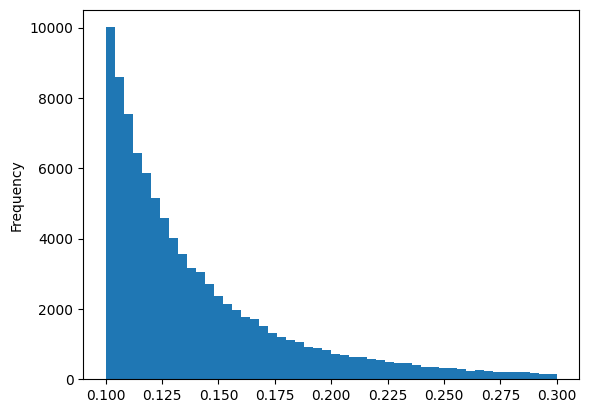

In [18]:
dense_nodes = pd.read_csv("dense_nodes.csv")
dense_nodes = dense_nodes[dense_nodes['score'] < 0.3]
dense_nodes.score.plot.hist(bins=50)

dense_nodes[dense_nodes.score == dense_nodes.score.max()]